<a href="https://colab.research.google.com/github/Ghanifhakbar/GDGOC-PERT2/blob/main/data_1(AUC_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#load CHN data
df = pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/AUC.csv')
df.head(10)


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


#Remove unnecessary columns

In [582]:
cols_to_remove = ['name', 'language']
df.drop(cols_to_remove, axis=1, inplace=True)

df.head()

,author,narrator,time,releasedate,stars,price
0,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,5 out of 5 stars34 ratings,468.00
1,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,4.5 out of 5 stars41 ratings,820.00
2,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,4.5 out of 5 stars38 ratings,410.00
3,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,4.5 out of 5 stars12 ratings,615.00
4,Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,4.5 out of 5 stars181 ratings,820.00


#Put columns into consistent format

In [583]:
#convert ketipe data float
df['stars'] = df['stars'].str.extract('(\d+\.?\d*)').astype(float)

In [584]:
#Konversi ke tipe data datetime.
df['releasedate'] = pd.to_datetime(df['releasedate'], format='%d-%m-%y')

In [585]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [586]:
def convert_to_minutes(time_str):
    # Ekstrak jam
    hours = 0
    if 'hrs' in time_str:
        hours = int(time_str.split('hrs')[0].strip())

    # Ekstrak menit
    minutes = 0
    if 'mins' in time_str:
        minutes = int(time_str.split('mins')[0].split('and')[-1].strip())

    # Hitung total menit
    total_minutes = hours * 60 + minutes
    return total_minutes

# Terapkan fungsi ke kolom 'time'
df['time'] = df['time'].apply(convert_to_minutes)


In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   author       87489 non-null  object        
 1   narrator     87489 non-null  object        
 2   time         87489 non-null  int64         
 3   releasedate  87489 non-null  datetime64[ns]
 4   stars        15072 non-null  float64       
 5   price        87151 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.0+ MB


In [588]:
df.head()

,author,narrator,time,releasedate,stars,price
0,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-08-04,5.0,468.0
1,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-05-01,4.5,820.0
2,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-11-06,4.5,410.0
3,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-10-05,4.5,615.0
4,Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,4.5,820.0


#Checking missing values

In [589]:

df.isna().sum()

,0
author,0
narrator,0
time,0
releasedate,0
stars,72417
price,338


#Checking duplicated values

In [590]:
df.duplicated().sum()

2771

- Removing duplicated rows

In [591]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

#Visualize numerical columns with boxplot

In [592]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 84718 entries, 0 to 87488
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   author       84718 non-null  object        
 1   narrator     84718 non-null  object        
 2   time         84718 non-null  int64         
 3   releasedate  84718 non-null  datetime64[ns]
 4   stars        15020 non-null  float64       
 5   price        84384 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.5+ MB


In [593]:
df.head(10)

,author,narrator,time,releasedate,stars,price
0,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-08-04,5.0,468.0
1,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-05-01,4.5,820.0
2,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-11-06,4.5,410.0
3,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-10-05,4.5,615.0
4,Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,4.5,820.0
5,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,635,2018-10-30,5.0,656.0
6,Writtenby:WinterMorgan,Narratedby:LukeDaniels,143,2014-11-25,5.0,233.0
7,Writtenby:RickRiordan,Narratedby:RobbieDaymond,752,2017-05-02,5.0,820.0
8,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,656,2017-05-02,5.0,1256.0
9,Writtenby:RickRiordan,Narratedby:RobbieDaymond,802,2019-09-24,5.0,820.0


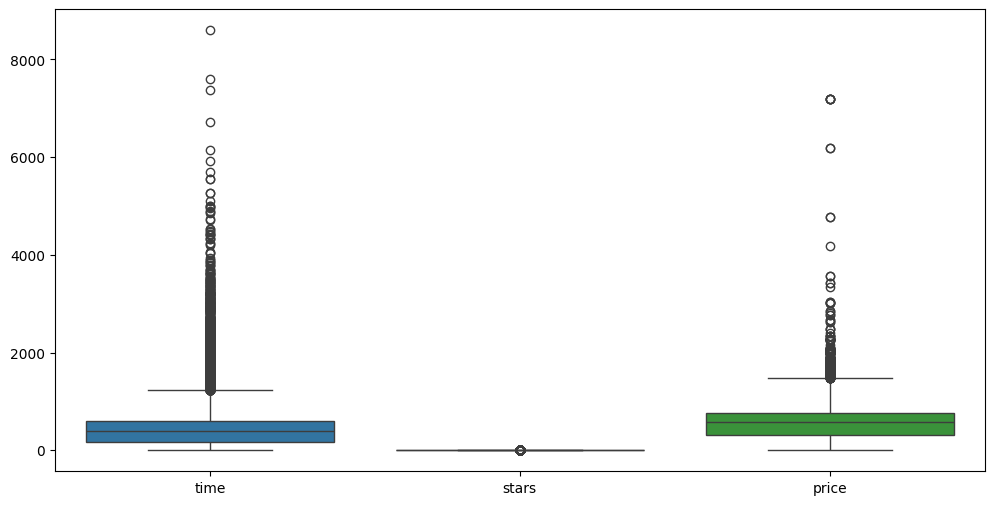

In [594]:
num_cols = ['time', 'stars', 'price']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

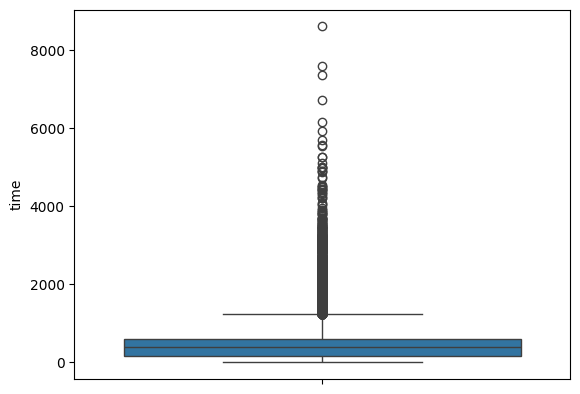

In [595]:
sns.boxplot(data=df['time'])
plt.show()

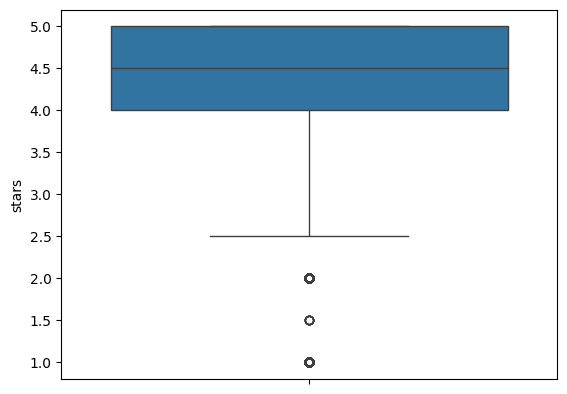

In [596]:
sns.boxplot(data=df['stars'])
plt.show()

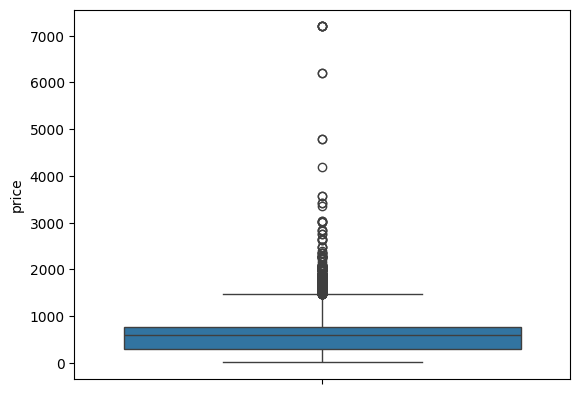

In [597]:
sns.boxplot(data=df['price'])
plt.show()

#Visualize numerical columns with Histogram Plot

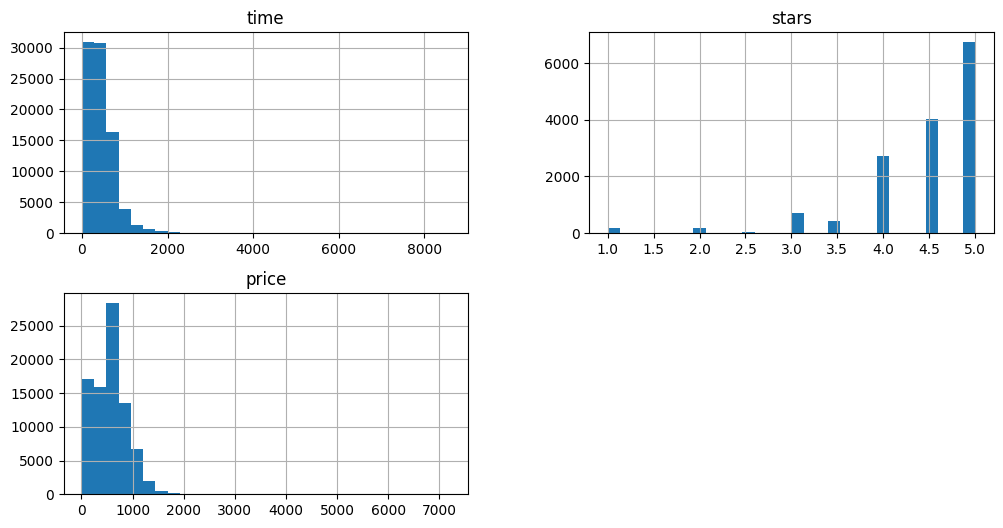

In [598]:
df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [599]:
df.head(5
        )

,author,narrator,time,releasedate,stars,price
0,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-08-04,5.0,468.0
1,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-05-01,4.5,820.0
2,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-11-06,4.5,410.0
3,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-10-05,4.5,615.0
4,Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,4.5,820.0


Reducing Outliers by Removing the outliers `time` column

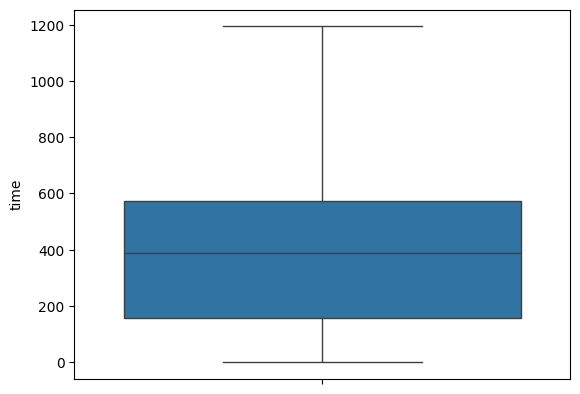

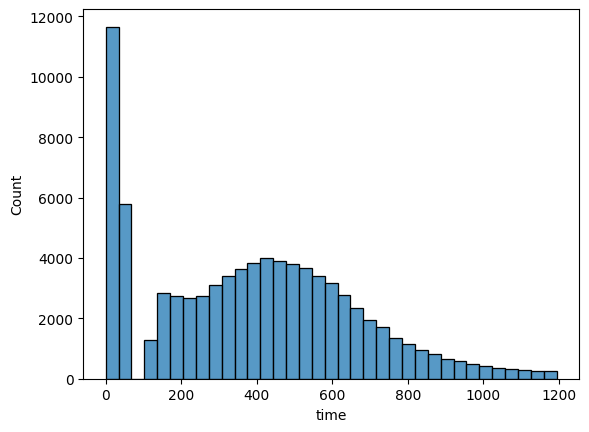

In [600]:

# Menghitung kuartil dan IQR
Q1 = df['time'].quantile(0.25)
Q3 = df['time'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah dengan faktor IQR 2
upper_bound = Q3 + 1.41 * IQR
lower_bound = Q1 - 1.41 * IQR

# Memfilter data
df = df[(df['time'] >= lower_bound) & (df['time'] <= upper_bound)]

# Membuat boxplot dari data yang telah difilter
sns.boxplot(data=df['time'])
plt.show()

sns.histplot(data=df['time'], bins=35)
plt.show()

Reducing Outliers by Removing the outliers `price` column

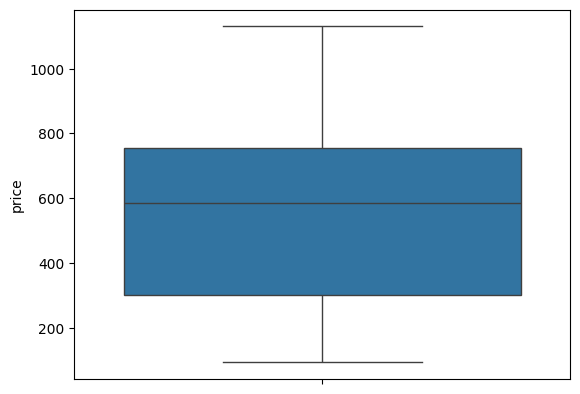

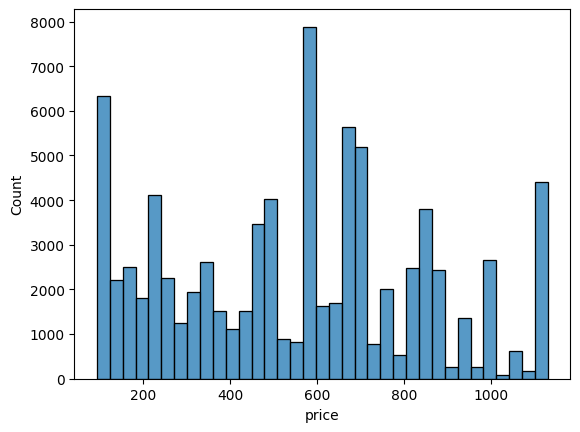

In [601]:
from scipy.stats.mstats import winsorize

df['price'] = winsorize(df['price'], limits=[0.05, 0.05])

sns.boxplot(data=df['price'])
plt.show()

sns.histplot(data=df['price'], bins=35)
plt.show()

#Split data into train & test to avoid data leakage

In [602]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65845, 5), (16462, 5), (65845,), (16462,))

In [603]:
df.isna().sum()

,0
author,0
narrator,0
time,0
releasedate,0
stars,68122
price,0


#Feature Scaling (numerical column only!!)

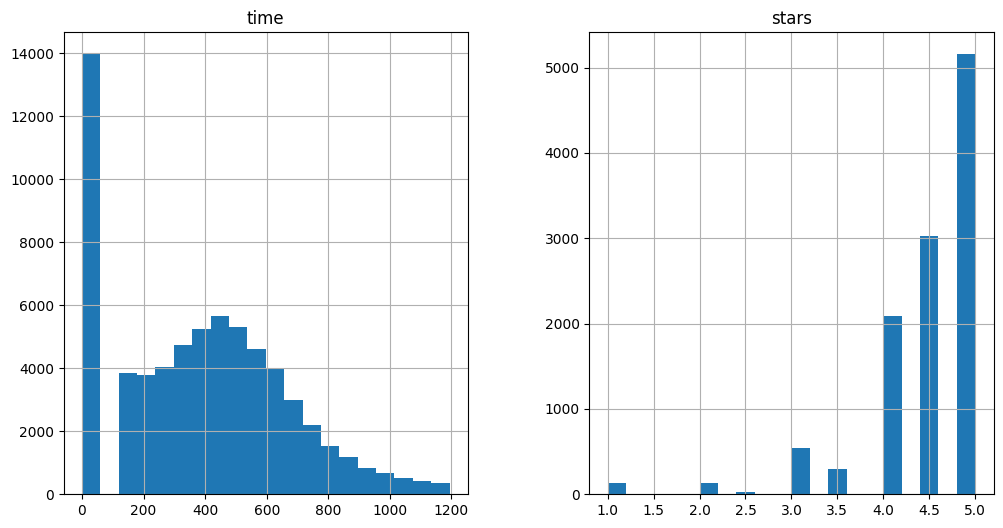

In [604]:
# Remove 'price' from num_cols as it has been dropped during feature selection.
num_cols = ['time', 'stars']

# Now you can plot the remaining features:
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

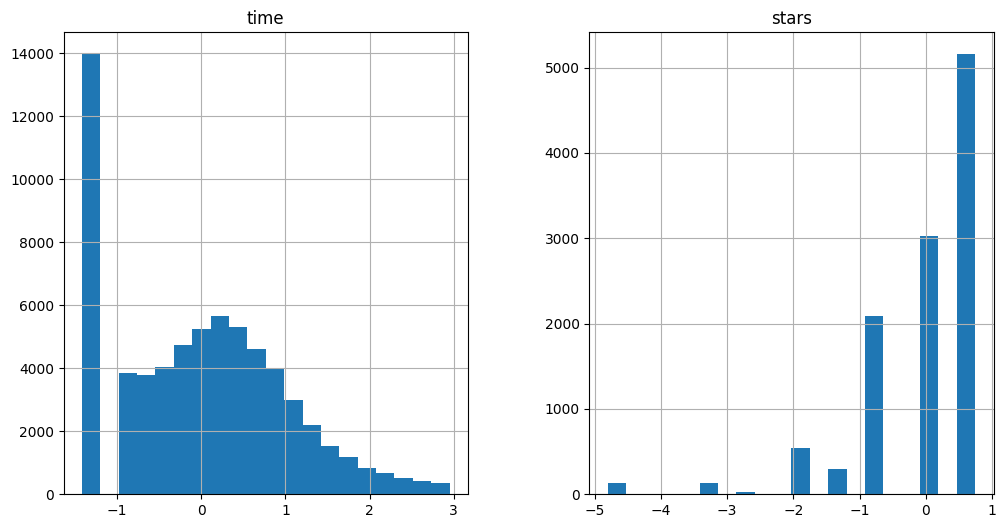

In [605]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

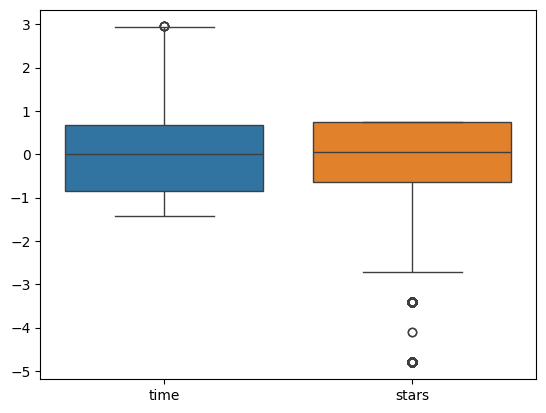

In [606]:
sns.boxplot(data=X_train[num_cols])
plt.show()

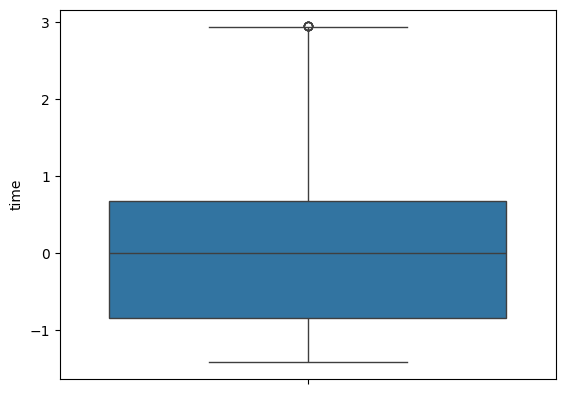

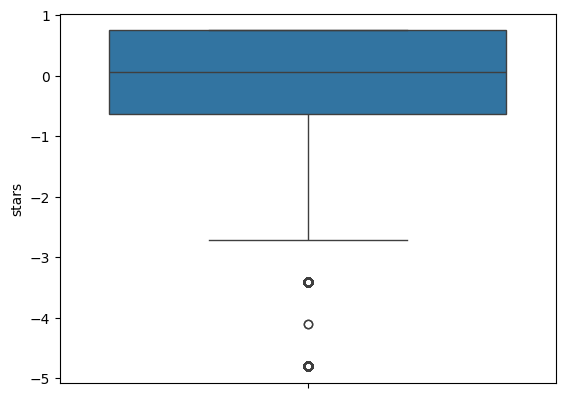

In [607]:
sns.boxplot(data=X_train['time'])
plt.show()

sns.boxplot(data=X_train['stars'])
plt.show()

#Handling Missing Values

In [608]:
X_train.isna().sum() / len(X_train)

,0
author,0.000000
narrator,0.000000
time,0.000000
releasedate,0.000000
stars,0.826821


In [609]:
X_test.isna().sum() / len(X_test)

,0
author,0.000000
narrator,0.000000
time,0.000000
releasedate,0.000000
stars,0.831005


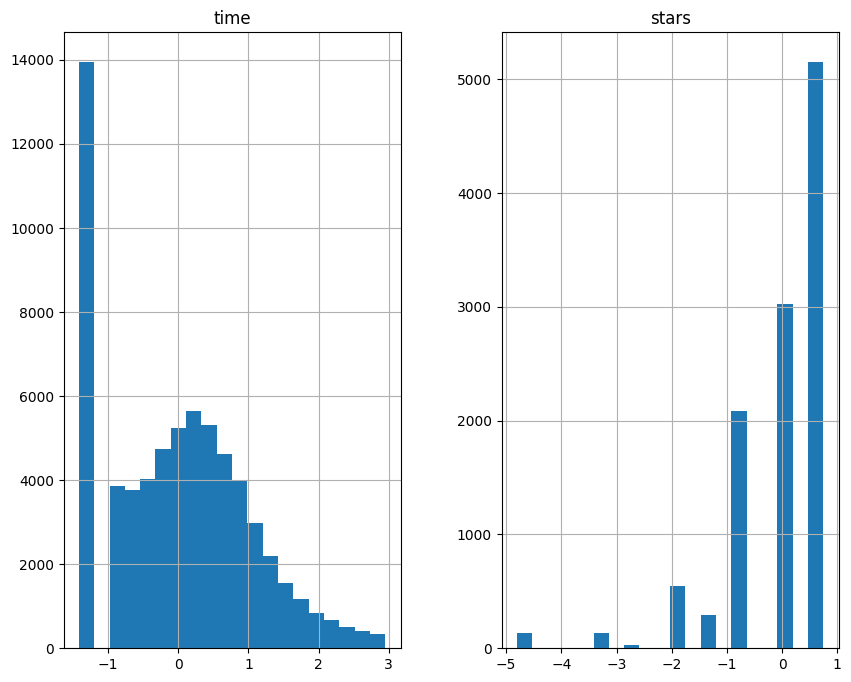

In [610]:
X_train[['time', 'stars']].hist(bins=20, figsize=(10, 8))
plt.show()

#Check Skewness

In [611]:
X_train['time'].skew(), X_train['stars'].skew()

(0.37103190423752014, -2.1549143691150867)

#Missing Value imputation

In [612]:
X_train['time'].fillna(X_train['time'].median(), inplace=True)
X_test['time'].fillna(X_test['time'].median(), inplace=True)

X_train['stars'].fillna(X_train['stars'].median(), inplace=True)
X_test['stars'].fillna(X_test['stars'].median(), inplace=True)

X_train.isna().sum() / len(X_train)

,0
author,0.0
narrator,0.0
time,0.0
releasedate,0.0
stars,0.0


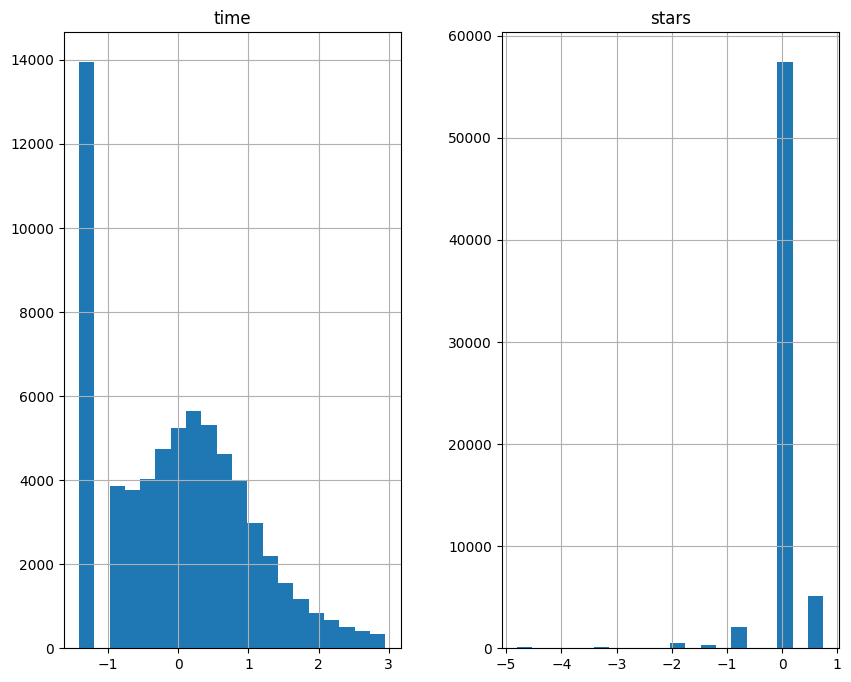

In [613]:
X_train[['time', 'stars']].hist(bins=20, figsize=(10, 8))
plt.show()


In [614]:
print(X_test.isna().sum())

author         0
narrator       0
time           0
releasedate    0
stars          0
dtype: int64


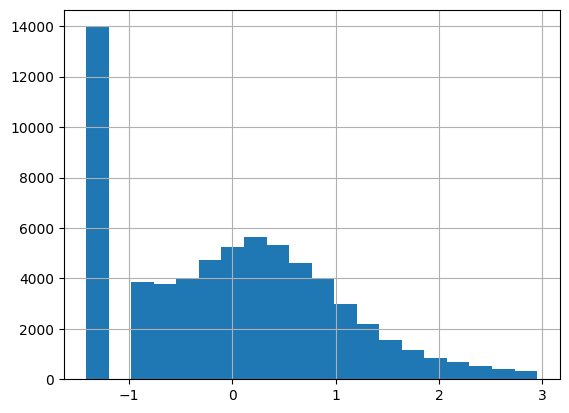

In [615]:
X_train['time'].hist(bins=20)
plt.show()

In [616]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*90)
for col in categorical_cols:
    print(X_train[col].value_counts().sort_index()) # Mengurutkan berdasarkan index
    print('-'*90)

------------------------------------------------------------------------------------------
author
Writtenby:#DerApotheker        1
Writtenby:(株)志麻ヒプノ・ソリューション    10
Writtenby:11FREUNDE            2
Writtenby:21-DayChallenges     2
Writtenby:365Conseils          1
                              ..
Writtenby:齋藤太郎                 1
Writtenby:齋藤孝                  1
Writtenby:齋藤清一郎                1
Writtenby:ＤＵＫＥ。                1
Writtenby:ＳＯＷ                  1
Name: count, Length: 39771, dtype: int64
------------------------------------------------------------------------------------------
narrator
Narratedby:@dieserdad        1
Narratedby:A'DinaMichel      1
Narratedby:A'DinaMichele     1
Narratedby:A.Almeida         1
Narratedby:A.C.Fellner      12
                            ..
Narratedby:鶴間和幸              1
Narratedby:黒木紳太郎             1
Narratedby:黒田崇矢,鳥海浩輔         1
Narratedby:黒鉄ヒロシ             1
Narratedby:齋藤清一郎             1
Name: count, Length: 24966, dtype: int64
----------------

#Categorical Encoding

In [617]:
# frequency encoding

import matplotlib.pyplot as plt
# Frequency Encoding
for col in categorical_cols:
    freq_encoding = X_train.groupby(col)['time'].count() / len(X_train)
    X_train[col + '_freq_encoded'] = X_train[col].map(freq_encoding)
    X_test[col + '_freq_encoded'] = X_test[col].map(freq_encoding)

# Display the frequency encoded data (first few rows for brevity)
print(X_train[[col for col in X_train.columns if '_freq_encoded' in col]].head())

       author_freq_encoded  narrator_freq_encoded
20211             0.000076               0.000030
25116             0.000015               0.000046
82389             0.000030               0.000030
25444             0.000015               0.000015
80721             0.000030               0.000015


In [618]:
X_train.columns

Index(['author', 'narrator', 'time', 'releasedate', 'stars',
       'author_freq_encoded', 'narrator_freq_encoded'],
      dtype='object')

In [619]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
price
586.0     4419
1131.0    3510
668.0     3426
93.0      3388
703.0     2895
          ... 
540.0        1
723.0        1
123.0        1
571.0        1
704.0        1
Name: count, Length: 697, dtype: int64

Test Label 
price
586.0     1098
1131.0     862
668.0      834
93.0       807
703.0      655
          ... 
765.0        1
634.0        1
540.0        1
253.0        1
170.0        1
Name: count, Length: 502, dtype: int64


In [620]:
X_train

,author,narrator,time,releasedate,stars,author_freq_encoded,narrator_freq_encoded
20211,Writtenby:LucasHugoPavetto,Narratedby:OmarMestroni,-1.416019,2021-01-21,0.053495,0.000076,0.000030
25116,"Writtenby:EmanuelaMaccarani,IlariaBrugnotti",Narratedby:PatriziaSalmoiraghi,0.423283,2020-03-03,0.053495,0.000015,0.000046
82389,Writtenby:MeganMilks,Narratedby:MeganMilks,0.394030,2021-11-02,0.053495,0.000030,0.000030
25444,"Writtenby:LauraTrott,JasonKenny","Narratedby:GuyMott,CassieLayton",0.357463,2018-04-19,0.053495,0.000015,0.000015
80721,Writtenby:JackieRobinson,Narratedby:OssieDavis,-0.761476,2008-08-06,0.053495,0.000030,0.000015
...,...,...,...,...,...,...,...
6653,Writtenby:RalphErdenberger,Narratedby:PeterKaempfe,-0.863862,2015-01-20,0.053495,0.000046,0.000213
58834,Writtenby:SantosOmarMedranoChura,Narratedby:AlvaroM.,-1.306319,2021-06-02,0.053495,0.000091,0.000030
81762,"Writtenby:MarkPfetzer,JackGalvin",Narratedby:JeremyBeck,-0.030143,2019-02-19,0.053495,0.000015,0.000015
887,"Writtenby:ScottCawthon,KiraBreed-Wrisley",Narratedby:SuzanneEliseFreeman,0.807233,2018-06-26,0.747470,0.000015,0.000273


In [621]:
# merge label with feature
X_train['price'] = y_train
X_test['price'] = y_test

In [622]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65845 entries, 20211 to 17793
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   author                 65845 non-null  object        
 1   narrator               65845 non-null  object        
 2   time                   65845 non-null  float64       
 3   releasedate            65845 non-null  datetime64[ns]
 4   stars                  65845 non-null  float64       
 5   author_freq_encoded    65845 non-null  float64       
 6   narrator_freq_encoded  65845 non-null  float64       
 7   price                  65845 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 4.5+ MB


In [623]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16462 entries, 74657 to 32163
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   author                 16462 non-null  object        
 1   narrator               16462 non-null  object        
 2   time                   16462 non-null  float64       
 3   releasedate            16462 non-null  datetime64[ns]
 4   stars                  16462 non-null  float64       
 5   author_freq_encoded    8644 non-null   float64       
 6   narrator_freq_encoded  12029 non-null  float64       
 7   price                  16462 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.1+ MB


In [624]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Imputasi missing value pada X_train
X_train['time'].fillna(X_train['time'].median(), inplace=True)
X_train['stars'].fillna(X_train['stars'].median(), inplace=True)

# Imputasi missing value pada X_test (menggunakan median dari X_test)
X_test['time'].fillna(X_test['time'].median(), inplace=True)
X_test['stars'].fillna(X_test['stars'].median(), inplace=True)


In [625]:
# Handling duplicated data
X_train.drop_duplicates(inplace=True)
X_test.drop_duplicates(inplace=True)

In [626]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
